# Covid-19 EU data analysis, plots and visualization.

Data source: https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv

Notebook created by: Evgeni Semenov (dev@safemail.sbs)

Credits to Aki Taanila (https://tilastoapu.wordpress.com/python/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

%matplotlib inline

print("Initializing data.....")

# Ignoring warnings
warnings.filterwarnings('ignore')

# Graph style setup
plt.style.use('seaborn-whitegrid')

# Loading European Covid-19 data (updated weekly)
df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv")

# Weeks as index
df = df.set_index('year_week')

# Removing not needed columns
df = df.drop(['note', 'source'], axis=1)

# Creating separate dataframes for cases and deaths
df_cases = df[df['indicator'] == 'cases']
df_deaths = df[df['indicator'] == 'deaths']

# Filling NaN values with 0
df_cases['rate_14_day'] = df_cases['rate_14_day'].fillna(0)
df_cases['cumulative_count'] = df_cases['cumulative_count'].fillna(0)

df_deaths['rate_14_day'] = df_deaths['rate_14_day'].fillna(0)
df_deaths['cumulative_count'] = df_deaths['cumulative_count'].fillna(0)

# Calculating new value 'cases_rate'which illustrates the amount of population (%) who had Covid-19
df_cases['cases_rate'] = (df_cases['cumulative_count'].astype(int) / df_cases['population'].astype(int)) * 100

# Calculating new value 'death_rate' which illustrates Covid-19 deaths / 1M of population
df_deaths['death_rate'] = (df_deaths['cumulative_count'].astype(int) / df_deaths['population'].astype(int)) * 1000000

# Adding a new field to df_deaths dataframe called "case_fatality" to illustrate the cumulative amount in % of deaths / reported cases
df_deaths['case_fatality'] = (df_deaths.cumulative_count / df_cases.cumulative_count) * 100
df_deaths['case_fatality'] = df_deaths['case_fatality'].fillna(0)
    
print("Data for range of weeks "+df.head(1).index.values[0]+" - "+df.tail(1).index.values[0]+" loaded.")
   

def list_countries(): # returns a list of available countries
    list_ctr = df_cases['country'].drop_duplicates().tolist()
    return(list_ctr)

def cases(country, weeks): # draws a plot of cases per country. Year from current week.
    df_country = df_cases[df_cases.country == country][['weekly_count', 'population']].iloc[-weeks:] #you can change/remove the .iloc[] value
    fig, ax1 = plt.subplots(figsize = (14, 6))
    ax1.set_ylabel('Weekly cases', color = 'C0')
    ax1.plot(df_country.weekly_count, color = 'C0')
    ctr_population = df_country.population[0].astype(int).astype(str)
    ax1.set_title(country + ' (population ' + ctr_population +')')
    plt.xticks(rotation = 90)
    
    print(datetime.now())
    
def cases_compare(country_list, weeks): # compares several countries cases and draws a plot.
    title = "Covid-19 cases in "
    fig, ax = plt.subplots(figsize = (14, 6))
    for country in country_list:
        ax.plot(df_cases[df_cases.country == country].rate_14_day.iloc[-weeks:], label = country)
        title = title + country + ", "
    ax.set_ylabel('Rate 14 days / 100k')
    ax.set_title(title[:-2]) #slicing 2 characters ", " from the end of the title 
    
    # Xticks (labels) rotation
    plt.xticks(rotation=90)
    
    # Enabling legend
    ax.legend()
    
    print(datetime.now())  
  

def deaths_plot(): # draws a plot of Covid-19 deaths
    latest_week_number = df_cases.tail(1).index.values[0]
    plot_df = df_deaths.loc[latest_week_number].sort_values(by = 'death_rate', ascending = True)
    plot_df = plot_df[['country', 'death_rate']].reset_index(drop = True)
    plot_df = plot_df.set_index('country')
    
    # Drawing a plot
    cmap = plt.cm.tab10
    colors = cmap(np.arange(len(plot_df)) % cmap.N)
    ax1 = plot_df['death_rate'].plot.barh(figsize=(10,14),color=colors)

    # Setting labels
    ax1.set_ylabel('')
    ax1.set_xlabel('Number of deaths / 1M population (cumulative) from start of pandemic')

    ax1.grid(axis = 'y')
    
    print(datetime.now())
    

def case_fatality_plot(country, weeks): #takes country name and amount of weeks, where 0 = all data. Draws a plot of case fatalities.
    fig, ax = plt.subplots(figsize = (30, 14))
    ax.set_ylabel('Case fatality, %')
    ax.plot(df_deaths[df_deaths.country == country].case_fatality.iloc[-weeks:])
    ax.set_title('Case fatalities for '+country+', population: '+df_deaths[df_deaths.country == country].population.iloc[-1].astype(str))
    plt.xticks(rotation=90)

    print(datetime.now())

Initializing data.....
Data for range of weeks 2020-01 - 2022-29 loaded.


In [2]:
# List of available countries
list_countries = list_countries()
print ("Data available for:")
for country in list_countries:
    print(country)

Data available for:
Austria
Belgium
Bulgaria
Croatia
Cyprus
Czechia
Denmark
Estonia
Finland
France
Germany
Greece
Hungary
Iceland
Ireland
Italy
Latvia
Liechtenstein
Lithuania
Luxembourg
Malta
Netherlands
Norway
Poland
Portugal
Romania
Slovakia
Slovenia
Spain
Sweden


2022-08-03 09:07:09.581716


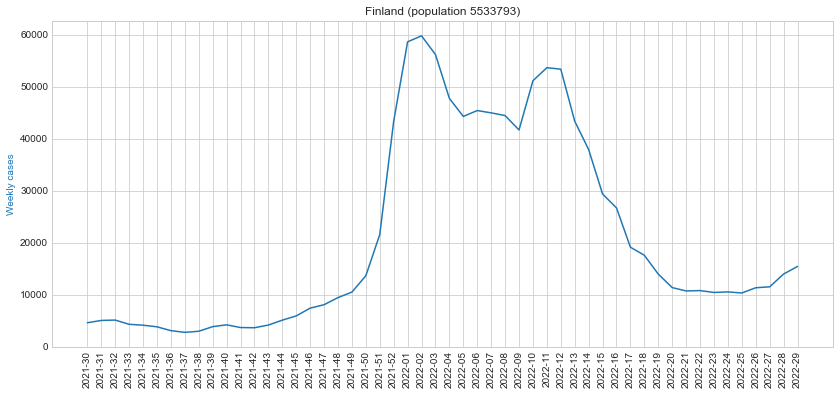

In [3]:
# Showing a plot of cases for specific country for a selected number of weeks.
# Please refer to the list above for available countries.
cases('Finland', 52) # Country and number of weeks. 0 = full history from start of the pandemic.

2022-08-03 09:07:10.313124


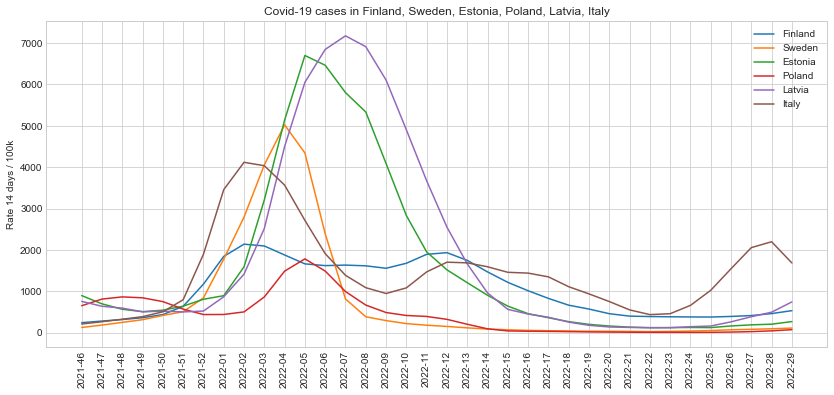

In [4]:
# Comparing Covid-19 cases (14 days / 100k of population) for list of countries
countries = ['Finland', 'Sweden', 'Estonia', 'Poland', 'Latvia', 'Italy'] # you can add/remove/modify as many countries as you wish
cases_compare(countries, 36) # this function takes a list of countries and number of weeks. 0 = from the start of the pandemic.

2022-08-03 09:07:10.752852


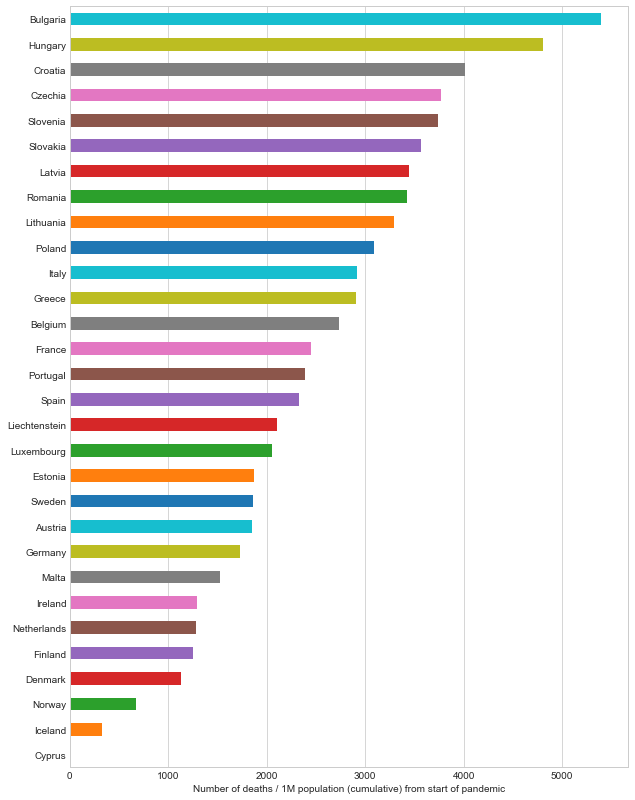

In [5]:
# Plot of cumulative deaths / 1M of population since the start of pandemic
deaths_plot()

2022-08-03 09:07:11.082621


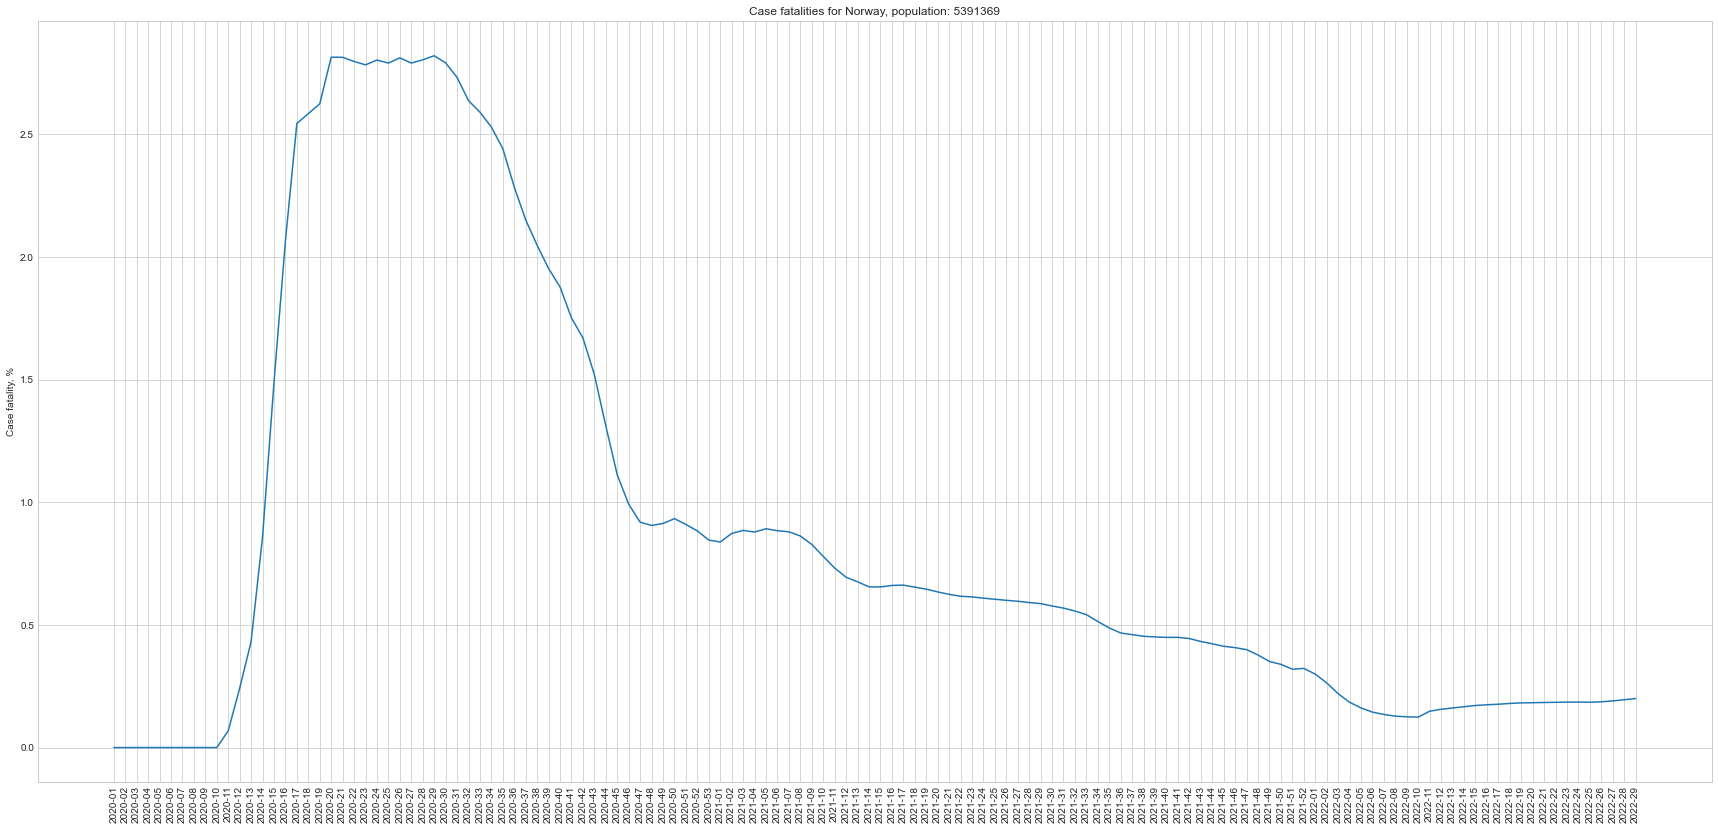

In [6]:
# Case fatalities plot. 
case_fatality_plot('Norway',0) # takes a country and amount of weeks. 0 = since the start of the pandemic.